In [1]:
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [3]:
df = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [6]:
x = df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
x

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [7]:
# before dimensionality reduction on x make sure to standard normalize the data
scaler = StandardScaler()
normal_x = scaler.fit_transform(x)
normal_x

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [8]:
print(normal_x.mean())
print(normal_x.std())

-2.48689957516e-16
1.0


In [9]:
pca1 = PCA()
components = pca1.fit_transform(normal_x)
components

array([[ -2.26454173e+00,   5.05703903e-01,  -1.21943348e-01,
         -2.30733235e-02],
       [ -2.08642550e+00,  -6.55404729e-01,  -2.27250832e-01,
         -1.03208244e-01],
       [ -2.36795045e+00,  -3.18477311e-01,   5.14796236e-02,
         -2.78252250e-02],
       [ -2.30419716e+00,  -5.75367713e-01,   9.88604444e-02,
          6.63114622e-02],
       [ -2.38877749e+00,   6.74767397e-01,   2.14278490e-02,
          3.73972870e-02],
       [ -2.07053681e+00,   1.51854856e+00,   3.06842583e-02,
         -4.39877494e-03],
       [ -2.44571134e+00,   7.45626750e-02,   3.42197636e-01,
          3.80965668e-02],
       [ -2.23384186e+00,   2.47613932e-01,  -8.25744645e-02,
          2.55051623e-02],
       [ -2.34195768e+00,  -1.09514636e+00,   1.53562399e-01,
          2.67938291e-02],
       [ -2.18867576e+00,  -4.48629048e-01,  -2.46559522e-01,
          3.99073035e-02],
       [ -2.16348656e+00,   1.07059558e+00,  -2.64009373e-01,
         -1.53011377e-02],
       [ -2.32737775e

In [10]:
pca1.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

In [11]:
pca2 = PCA(n_components=2)
components2 = pca2.fit_transform(normal_x)

In [12]:
pca2.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

In [13]:
df2 = DataFrame(components2, columns=['pc1', 'pc2'])
df2

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


In [14]:
df2['label'] = df['label']
df2

,pc1,pc2,label
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa


In [15]:
df2['label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
d1 = df2[df2['label'] == 'Iris-setosa']
d1['label'] = 0
d1

/home/mehul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,pc1,pc2,label
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0
5,-2.070537,1.518549,0
6,-2.445711,0.074563,0
7,-2.233842,0.247614,0
8,-2.341958,-1.095146,0
9,-2.188676,-0.448629,0


In [17]:
d2 = df2[df2['label'] == 'Iris-versicolor']
d2['label'] = 1
d2

/home/mehul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,pc1,pc2,label
50,1.103994,0.863112,1
51,0.732481,0.598636,1
52,1.242110,0.614822,1
53,0.397307,-1.758169,1
54,1.072594,-0.211758,1
55,0.384458,-0.591062,1
56,0.748715,0.778699,1
57,-0.497863,-1.848869,1
58,0.926222,0.030331,1
59,0.004968,-1.029401,1


In [18]:
d3 = df2[df2['label'] == 'Iris-virginica']
d3['label'] = 2
d3

/home/mehul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,pc1,pc2,label
100,1.847673,0.871697,2
101,1.153190,-0.701326,2
102,2.206349,0.554470,2
103,1.438685,-0.050011,2
104,1.867891,0.291193,2
105,2.754197,0.788432,2
106,0.358374,-1.560095,2
107,2.303006,0.409517,2
108,2.001735,-0.723865,2
109,2.267555,1.921443,2


In [19]:
d_combined = pd.concat([d1, d2, d3])
d_combined

,pc1,pc2,label
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0
5,-2.070537,1.518549,0
6,-2.445711,0.074563,0
7,-2.233842,0.247614,0
8,-2.341958,-1.095146,0
9,-2.188676,-0.448629,0


In [20]:
df2.corr()

,pc1,pc2
pc1,1.000000e+00,-1.868982e-16
pc2,-1.868982e-16,1.000000e+00


In [21]:
x_data = d_combined[['pc1', 'pc2']].values
y_data = d_combined['label'].values
print(x_data)
print(y_data)

[[ -2.26454173e+00   5.05703903e-01]
 [ -2.08642550e+00  -6.55404729e-01]
 [ -2.36795045e+00  -3.18477311e-01]
 [ -2.30419716e+00  -5.75367713e-01]
 [ -2.38877749e+00   6.74767397e-01]
 [ -2.07053681e+00   1.51854856e+00]
 [ -2.44571134e+00   7.45626750e-02]
 [ -2.23384186e+00   2.47613932e-01]
 [ -2.34195768e+00  -1.09514636e+00]
 [ -2.18867576e+00  -4.48629048e-01]
 [ -2.16348656e+00   1.07059558e+00]
 [ -2.32737775e+00   1.58587455e-01]
 [ -2.22408272e+00  -7.09118158e-01]
 [ -2.63971626e+00  -9.38281982e-01]
 [ -2.19229151e+00   1.88997851e+00]
 [ -2.25146521e+00   2.72237108e+00]
 [ -2.20275048e+00   1.51375028e+00]
 [ -2.19017916e+00   5.14304308e-01]
 [ -1.89407429e+00   1.43111071e+00]
 [ -2.33994907e+00   1.15803343e+00]
 [ -1.91455639e+00   4.30465163e-01]
 [ -2.20464540e+00   9.52457317e-01]
 [ -2.77416979e+00   4.89517027e-01]
 [ -1.82041156e+00   1.06750793e-01]
 [ -2.22821750e+00   1.62186163e-01]
 [ -1.95702401e+00  -6.07892567e-01]
 [ -2.05206331e+00   2.66014312e-01]
 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [23]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_pred = lr1.predict(x_test)

In [35]:
print(y_pred)

[ 1.45136903  0.00690691 -0.03412611  1.08644802  1.04436636  1.58908413
  1.26266277  0.00255423 -0.06870603  1.09727557  0.01142449  1.84257136
 -0.03999521 -0.02735825 -0.26040391  1.16914162  0.16552625  1.83700003
  1.89820342  1.38579351  1.8640837   1.22206072  2.30024553  1.28460096
  1.03519322  1.8102536   1.83762281 -0.00765054  0.12989967  1.21469699]


In [25]:
print(x_test)

[[ 0.97391511 -0.57117438]
 [-2.2111199  -0.18433781]
 [-2.34195768 -1.09514636]
 [ 0.12153421 -1.56359238]
 [ 0.08905311 -0.17490855]
 [ 1.25308651 -1.16739134]
 [ 0.57388349 -0.15371997]
 [-2.19017916  0.51430431]
 [-2.25146521  2.72237108]
 [ 0.15694118 -1.30310327]
 [-2.22408272 -0.70911816]
 [ 1.88425185  0.41433276]
 [-2.28652724  0.46799172]
 [-2.30419716 -0.57536771]
 [-2.77416979  0.48951703]
 [ 0.33000536 -0.98890073]
 [-1.8319381   0.44526684]
 [ 1.87052207  0.38282184]
 [ 2.0161572   0.61039704]
 [ 0.87589054  0.50999815]
 [ 1.95772766  1.00333452]
 [ 0.47236968 -0.41660822]
 [ 2.89806444  0.39779136]
 [ 0.55163398 -1.77258156]
 [ 0.0670676  -0.21262073]
 [ 1.78600886 -0.1932728 ]
 [ 1.8678907   0.2911928 ]
 [-2.2282175   0.16218616]
 [-1.95702401 -0.60789257]
 [ 0.39730728 -1.75816895]]


In [26]:
print(y_test)

[2 0 0 1 1 2 1 0 0 1 0 2 0 0 0 1 0 2 2 1 2 1 2 1 1 2 2 0 0 1]


In [27]:
lr1.score(x_train, y_train)

0.88168197399634496

In [28]:
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.157561626239
0.205434236509


In [36]:
x2 = d_combined[['pc1']].values
y2 = d_combined['label'].values
print(x2)
print(y2)

[[-2.26454173]
 [-2.0864255 ]
 [-2.36795045]
 [-2.30419716]
 [-2.38877749]
 [-2.07053681]
 [-2.44571134]
 [-2.23384186]
 [-2.34195768]
 [-2.18867576]
 [-2.16348656]
 [-2.32737775]
 [-2.22408272]
 [-2.63971626]
 [-2.19229151]
 [-2.25146521]
 [-2.20275048]
 [-2.19017916]
 [-1.89407429]
 [-2.33994907]
 [-1.91455639]
 [-2.2046454 ]
 [-2.77416979]
 [-1.82041156]
 [-2.2282175 ]
 [-1.95702401]
 [-2.05206331]
 [-2.16819365]
 [-2.14030596]
 [-2.26879019]
 [-2.14455443]
 [-1.8319381 ]
 [-2.60820287]
 [-2.43795086]
 [-2.18867576]
 [-2.2111199 ]
 [-2.04441652]
 [-2.18867576]
 [-2.4359522 ]
 [-2.1705472 ]
 [-2.28652724]
 [-1.87170722]
 [-2.55783442]
 [-1.96427929]
 [-2.13337283]
 [-2.07535759]
 [-2.38125822]
 [-2.39819169]
 [-2.22678121]
 [-2.20595417]
 [ 1.10399365]
 [ 0.73248144]
 [ 1.24210951]
 [ 0.39730728]
 [ 1.07259395]
 [ 0.38445815]
 [ 0.74871508]
 [-0.49786339]
 [ 0.92622237]
 [ 0.00496803]
 [-0.12469746]
 [ 0.43873012]
 [ 0.55163398]
 [ 0.71716507]
 [-0.03725838]
 [ 0.87589054]
 [ 0.34800

In [37]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2)

In [38]:
lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
y2_pred = lr2.predict(x2_test)

In [40]:
print(y2_pred)

[  1.86082030e+00  -4.74160100e-02   1.82712505e-03   6.89703403e-02
   1.50055486e+00   1.74758768e+00   1.90130782e-01   1.27908388e-01
   1.13415621e+00   1.47250963e-01   1.46285302e+00   1.52209944e+00
   1.35551823e+00   1.21762179e-02   1.68938616e+00   1.32084358e+00
   1.17777256e+00   1.63790007e+00   1.91094670e+00   1.12676233e+00
   2.23987729e-02   2.27371168e+00   4.24945596e-02   2.33923861e+00
  -4.07753435e-02   1.73897511e+00   1.30310061e+00   1.64616740e+00
   3.17276845e-02   1.58500659e+00]


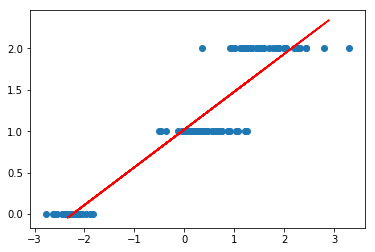

In [41]:
plt.scatter(x2_train, y2_train)
plt.plot(x2_test, y2_pred, color='red')
plt.show()

In [42]:
df2

,pc1,pc2,label
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa


In [45]:
pd.get_dummies(df2['label'])

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0
